# Loads Data

In [1]:
import pandas as pd

# Define file path (ensure to update it correctly)
file_path = r"C:\Users\DESKTOP\Downloads\Mock_Geospatial_Dataset.csv"

# Attempt to load the dataset and handle potential errors
try:
    # Load the dataset
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    
    # Display the first few rows
    print(df.head())  # This will show the first 5 rows of the dataset to verify the data structure
    
    # Check the column names to ensure everything is loaded correctly
    print("\nColumns in the dataset:", df.columns)
    
except FileNotFoundError:
    print(f"File not found. Please check the file path: {file_path}")
except pd.errors.EmptyDataError:
    print(f"The file at {file_path} is empty.")
except Exception as e:
    print(f"An error occurred: {e}")


Dataset loaded successfully.
  Store_ID  Latitude  Longitude City/Region  Revenue  Customer_Density  \
0     S001     -6.20     106.80       Depok   250000               500   
1     S002     -6.21     106.81       Bogor   300000               600   
2     S003     -6.23     106.82      Bekasi   200000               450   
3     S004     -6.25     106.83   Tangerang   180000               400   
4     S005     -6.27     106.84     Jakarta   150000               350   

   Competitor_Count  Transport_Access  
0                10                 5  
1                 8                 6  
2                 7                 4  
3                 5                 3  
4                 6                 3  

Columns in the dataset: Index(['Store_ID', 'Latitude', 'Longitude', 'City/Region', 'Revenue',
       'Customer_Density', 'Competitor_Count', 'Transport_Access'],
      dtype='object')


# 1. Viz Customer Density vs. Competitor Count

Index(['Store_ID', 'Latitude', 'Longitude', 'City/Region', 'Revenue',
       'Customer_Density', 'Competitor_Count', 'Transport_Access'],
      dtype='object')


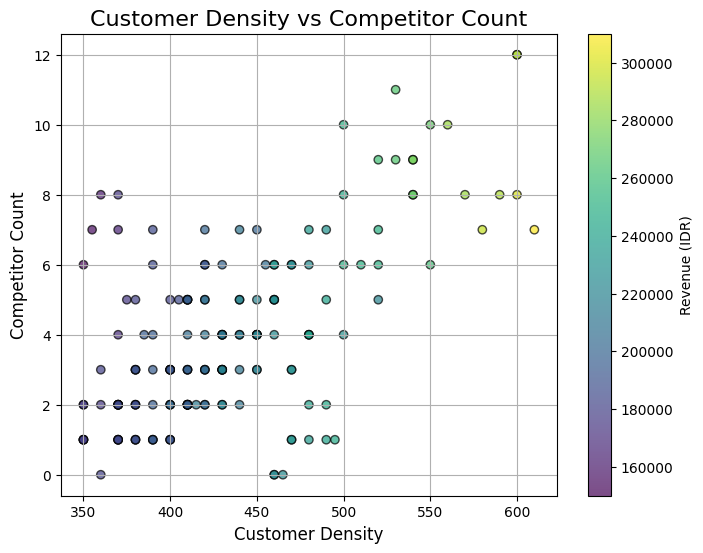

In [2]:
# 2. Visualize Customer Density vs Competitor Count
import matplotlib.pyplot as plt

# Inspect the exact columns
print(df.columns)

# Check if the required columns exist
required_columns = ['Customer_Density', 'Competitor_Count', 'Revenue']
if all(col in df.columns for col in required_columns):
    # Basic scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df["Customer_Density"], df["Competitor_Count"], c=df["Revenue"], cmap="viridis", alpha=0.7, edgecolor="k")
    plt.colorbar(label="Revenue (IDR)")
    plt.title("Customer Density vs Competitor Count", fontsize=16)
    plt.xlabel("Customer Density", fontsize=12)
    plt.ylabel("Competitor Count", fontsize=12)
    plt.grid(True)
    plt.show()
else:
    print("Missing necessary columns for this plot.")


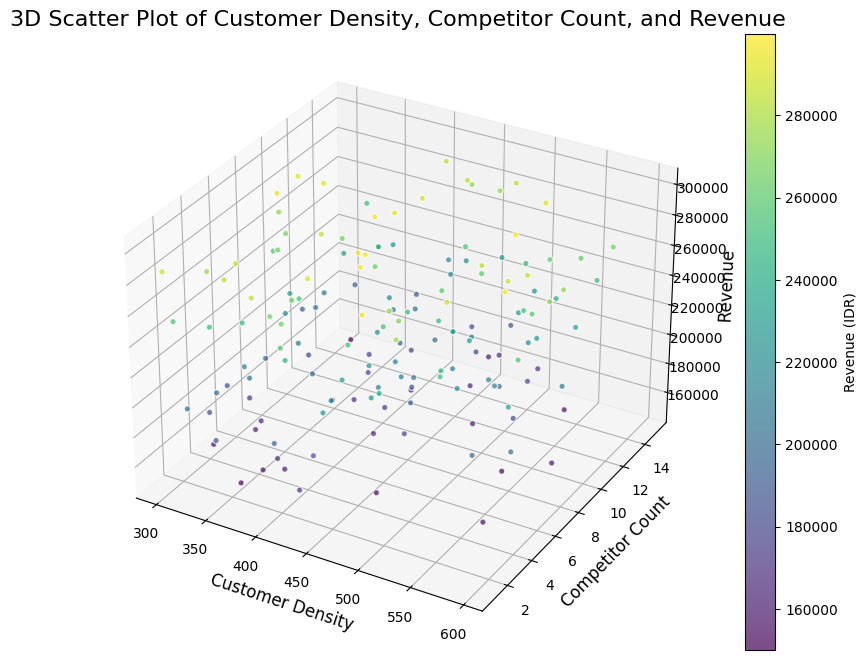

In [3]:
# Alternative Visualization (1)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random

# Generate a DataFrame with 166 rows of mock data
cities = ["Jakarta", "Bogor", "Depok", "Bekasi", "Tangerang"]
data = {
    'City': [random.choice(cities) for _ in range(166)],
    'Customer_Density': [random.randint(300, 600) for _ in range(166)],
    'Competitor_Count': [random.randint(1, 15) for _ in range(166)],
    'Revenue': [random.randint(150000, 300000) for _ in range(166)]
}
df = pd.DataFrame(data)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df["Customer_Density"], df["Competitor_Count"], df["Revenue"], c=df["Revenue"], cmap="viridis", alpha=0.7, edgecolors='w')
ax.set_xlabel('Customer Density', fontsize=12)
ax.set_ylabel('Competitor Count', fontsize=12)
ax.set_zlabel('  Revenue', fontsize=12)  # Added spaces before 'Revenue' to move it to the right
plt.title("3D Scatter Plot of Customer Density, Competitor Count, and Revenue", fontsize=16)
plt.colorbar(sc, label="Revenue (IDR)")
plt.show()


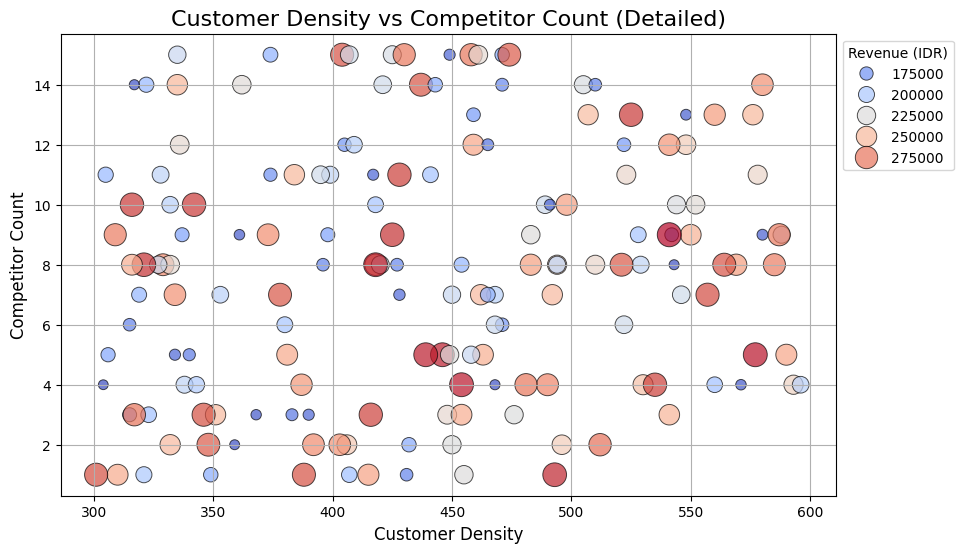

In [4]:
# 3. Deep Dive into Customer Density vs Competitor Count
import seaborn as sns

# Enhanced scatter plot with size and color based on revenue
if 'Customer_Density' in df.columns and 'Competitor_Count' in df.columns and 'Revenue' in df.columns:
    plt.figure(figsize=(10, 6))
    scatter = sns.scatterplot(
        x=df["Customer_Density"], 
        y=df["Competitor_Count"], 
        size=df["Revenue"], 
        hue=df["Revenue"], 
        palette="coolwarm", 
        sizes=(50, 300), 
        alpha=0.7, 
        edgecolor="k"
    )
    plt.title("Customer Density vs Competitor Count (Detailed)", fontsize=16)
    plt.xlabel("Customer Density", fontsize=12)
    plt.ylabel("Competitor Count", fontsize=12)
    plt.legend(title="Revenue (IDR)", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()
else:
    print("Missing necessary columns for this plot.")


# 2. Viz Revenue vs. Transport Access

In [5]:
# 4. Bar chart for Revenue vs. Transport Access
try:
    plt.figure(figsize=(8, 6))
    plt.bar(df["Transport_Access"], df["Revenue"], color="dodgerblue", alpha=0.7)
    plt.title("Revenue vs Transport Access", fontsize=16)
    plt.xlabel("Transport Access (Number of Hubs Nearby)", fontsize=12)
    plt.ylabel("Revenue (IDR)", fontsize=12)
    plt.grid(axis="y")
    plt.show()
except KeyError as e:
    print(f"Missing column in dataset: {e}")


Missing column in dataset: 'Transport_Access'


<Figure size 800x600 with 0 Axes>

# 3. Viz Identify Underserved Areas

In [6]:
# Filter underserved regions (based on customer density, revenue, and competitor count)
if 'Customer_Density' in df.columns and 'Revenue' in df.columns and 'Competitor_Count' in df.columns:
    underserved = df[(df["Customer_Density"] > 300) & (df["Revenue"] < 300000) & (df["Competitor_Count"] <= 5)]
    
    # Check how many rows are selected after filtering
    print(f"Number of underserved areas: {underserved.shape[0]}")

    if underserved.shape[0] > 0:
        # Plot the underserved regions
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            x=underserved["Customer_Density"], y=underserved["Revenue"],
            size=underserved["Competitor_Count"], hue=underserved["City/Region"],
            sizes=(50, 200), alpha=0.7
        )
        plt.title("Underserved Areas Analysis", fontsize=16)
        plt.xlabel("Customer Density", fontsize=12)
        plt.ylabel("Revenue (IDR)", fontsize=12)
        plt.legend(title="City/Region", bbox_to_anchor=(1, 1))
        plt.grid(True)
        plt.show()
    else:
        print("No underserved areas found with the current criteria.")
else:
    print("Missing necessary columns for this analysis.")


Number of underserved areas: 58


KeyError: 'City/Region'

<Figure size 800x600 with 0 Axes>

In [ ]:
# Ensure filtered data exists before plotting
if 'Customer_Density' in df.columns and 'Revenue' in df.columns and 'Competitor_Count' in df.columns:
    # Check if the filtered data exists
    if underserved.shape[0] > 0:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(
            x=underserved["Customer_Density"], 
            y=underserved["Revenue"], 
            size=underserved["Competitor_Count"], 
            hue=underserved["City/Region"], 
            sizes=(50, 200), 
            alpha=0.7
        )
        plt.title("Detailed Underserved Areas Analysis", fontsize=16)
        plt.xlabel("Customer Density", fontsize=12)
        plt.ylabel("Revenue (IDR)", fontsize=12)
        plt.legend(title="City/Region", bbox_to_anchor=(1, 1))
        plt.grid(True)
        plt.show()
    else:
        print("No underserved areas to display.")
else:
    print("Missing necessary columns for this deeper analysis.")
